Steps for House Price Prediction using Linear Regression

1. Import required libraries

2. Load the dataset

3. Check correlation between features and House_Price

4. Select X (independent) and y (dependent) variables

5. Split data into training & testing sets

6. Train the model using Linear Regression

7. Get predictions on test data (y_pred)

8. Visualize predictions vs actual data

9. Create a function for user input predictions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
dataset = pd.read_csv('/content/house_price_regression_dataset.csv')

dataset.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


(1000, 8)

In [7]:
correlation_matrix = dataset.corr().T

print("Correlation matrix:\n")
correlation_matrix

Correlation matrix:



,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
Num_Bedrooms,-0.043564,1.000000,0.022848,-0.015820,-0.009355,0.113761,-0.049024,0.014633
Num_Bathrooms,-0.031584,0.022848,1.000000,-0.021063,0.034923,0.024846,0.017585,-0.001862
Year_Built,-0.022392,-0.015820,-0.021063,1.000000,-0.061050,-0.025485,-0.009549,0.051967
Lot_Size,0.089479,-0.009355,0.034923,-0.061050,1.000000,0.002436,0.037630,0.160412
Garage_Size,0.030593,0.113761,0.024846,-0.025485,0.002436,1.000000,-0.011287,0.052133
Neighborhood_Quality,-0.008357,-0.049024,0.017585,-0.009549,0.037630,-0.011287,1.000000,-0.007770
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


In [11]:
#Which features have strong correlation with the House Prices
postive_correlation = correlation_matrix[correlation_matrix['House_Price'] > 0.5]
postive_correlation

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
Square_Footage,1.000000,-0.043564,-0.031584,-0.022392,0.089479,0.030593,-0.008357,0.991261
House_Price,0.991261,0.014633,-0.001862,0.051967,0.160412,0.052133,-0.007770,1.000000


In [13]:
#Only feature is Square Foot
df = dataset[['Square_Footage','House_Price']]
df.head()

,Square_Footage,House_Price
0,1360,2.623829e+05
1,4272,9.852609e+05
2,3592,7.779774e+05
3,966,2.296989e+05
4,4926,1.041741e+06


In [15]:
X = df [['Square_Footage']] #[[]] to make it 2D array
y = df['House_Price']

In [18]:
print(X.head())
print('\n')
print(y.head())

   Square_Footage
0            1360
1            4272
2            3592
3             966
4            4926


0    2.623829e+05
1    9.852609e+05
2    7.779774e+05
3    2.296989e+05
4    1.041741e+06
Name: House_Price, dtype: float64


In [19]:
print(X.shape)
print(y.shape)

(1000, 1)
(1000,)


In [20]:
#Split dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
print("Training X and y:")
print(X_train.shape)
print(y_train.shape)
print("Testing X and y:")
print(X_test.shape)
print(y_test.shape)

Training X and y:
(700, 1)
(700,)
Testing X and y:
(300, 1)
(300,)


In [22]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = LR.predict(X_test)
y_pred

array([ 859042.87964853,  517531.7965537 ,  998697.2356027 ,
       1043643.46510519,  785603.95108642,  773564.78246968,
        984651.53888317,  882117.95283061,  812692.08047408,
        905393.67882297,  778380.44991638,  669626.62674517,
        210532.99682686, 1042238.89543323,  568698.26317484,
        231601.54190615,  492650.84807911,  396136.84633492,
        722598.96865882,  330122.07175313,  747479.91713341,
        514321.35158924,  719388.52369436,  884124.4809334 ,
        444293.52080187,  345772.99095489,  452118.98040275,
        437070.01963183,  238022.43183508,  451517.02197192,
        270728.83991056,  909406.73502855,  762528.87790434,
        333733.82233816,  481614.94351376,  777979.14429582,
        475996.66482595,  571908.70813931,  249459.64202098,
        186655.31240366,  320892.0424803 ,  255077.9207088 ,
        498469.7795772 ,  309655.48510468, 1056284.59215276,
        929472.01605645,  798847.03656483,  812090.12204324,
        991273.08162237,

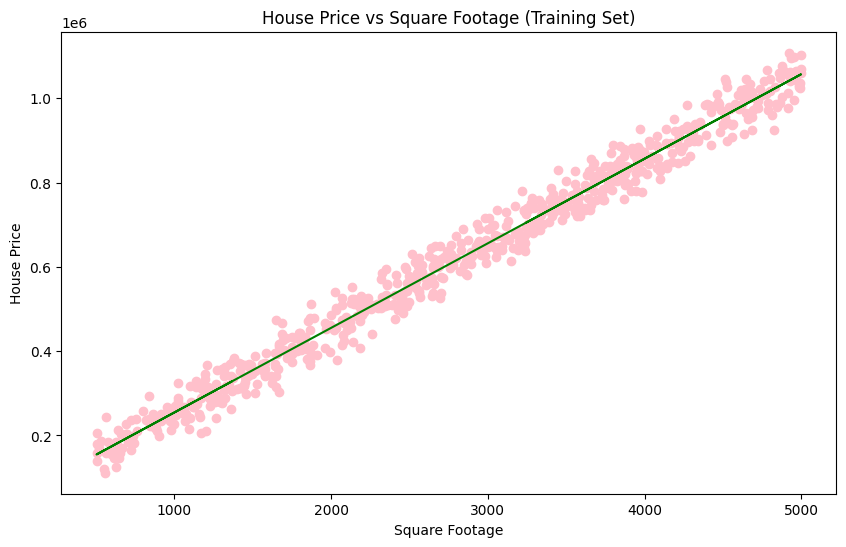

In [24]:
#Visualize the Training set (House price vs Square footage)

plt.figure(figsize=(10, 6))

actual_color = 'pink'
preditcted_color = 'green'

plt.scatter(X_train, y_train, color= actual_color, label='Actual Price')
plt.plot(X_train, LR.predict(X_train), color= preditcted_color, label='Predicted Price')

plt.title('House Price vs Square Footage (Training Set)')
plt.xlabel('Square Footage')
plt.ylabel('House Price')


plt.show()


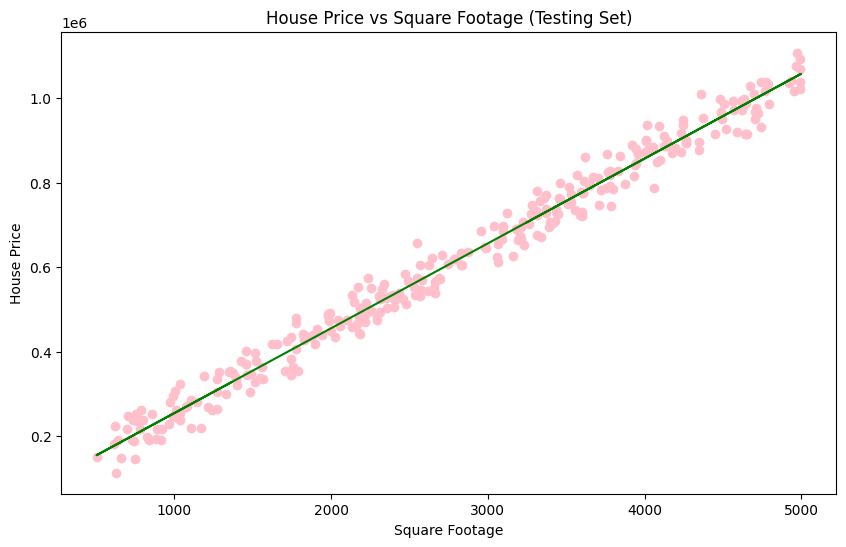

In [27]:
#Visualize the Testing set (House price vs Square footage)

plt.figure(figsize=(10, 6))

actual_color = 'pink'
preditcted_color = 'green'

plt.scatter(X_test['Square_Footage'], y_test, color= actual_color, label='Actual Price')
plt.plot(X_train['Square_Footage'], LR.predict(X_train), color= preditcted_color, label='Predicted Price')

plt.title('House Price vs Square Footage (Testing Set)')
plt.xlabel('Square Footage')
plt.ylabel('House Price')


plt.show()


In [30]:
#Prediction for the price from square footage
def predict_price(square_footage):
    return LR.predict([[square_footage]])[0]

square = float(input("Enter the square footage: "))
predicted_price = predict_price(square)

print(f'Predicted price for {square} square footage is: ${predicted_price:.2f}')

Enter the square footage: 650
Predicted price for 650.0 square footage is: $184448.13


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
